### Linear Regression   ( This code is taken from Mengsay's note https://github.com/loem-ms. )

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = np.array([152,157,160,163,150,147,165,168,170])
y = np.array([54.48,55.84,57.20,56.57,53.12,52.21,59.93,61.29,67.92])

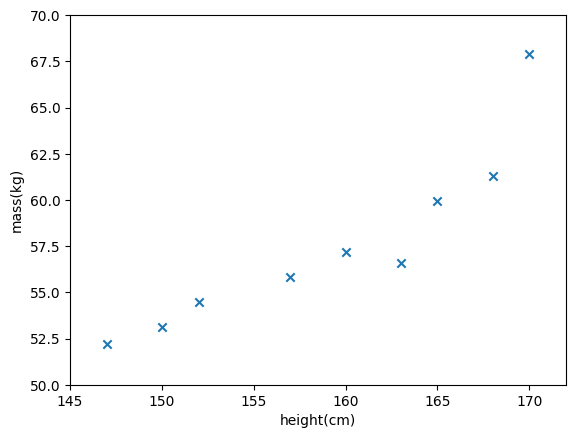

In [8]:
plt.scatter(X,y,marker='x')
plt.xlim([145,172])
plt.ylim([50,70])
plt.xlabel('height(cm)')
plt.ylabel('mass(kg)')
plt.show()

In [9]:
def fit(x,y,k):
  X_ = np.zeros((len(x),k+1))
  for i in range(k+1):
    X_[:,i] = x**i
  w = np.linalg.inv(X_.T@X_)@X_.T@y
  return w

def predict(x,w,k):
  X_ = np.zeros((len(x),k+1))
  for i in range(k+1):
    X_[:,i] = x**i
  return X_@w

In [10]:
w = fit(X,y,1)
w

array([-27.93562969,   0.537696  ])

R2=0.816


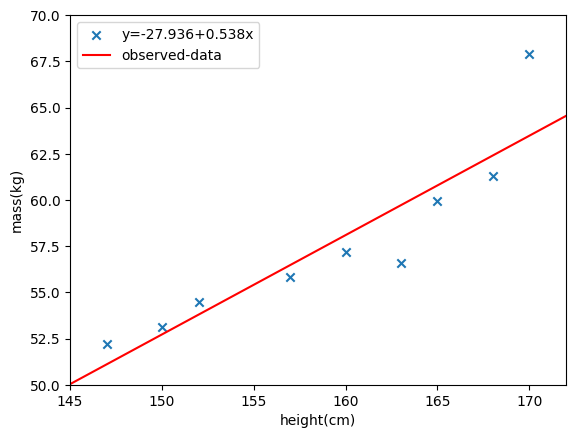

In [11]:
cov_YY = np.cov(predict(X,w,1),y)
R2 = cov_YY[0,0]/cov_YY[1,1]
print("R2=%.3f"%(R2))
xa = np.linspace(145,172,50)
plt.scatter(X,y,marker='x')
plt.plot(xa,predict(xa,w,1),'r-')
plt.xlim([145,172])
plt.ylim([50,70])
plt.xlabel('height(cm)')
plt.ylabel('mass(kg)')
y_legend = "y="+str(round(w[0],3))+"+"+str(round(w[1],3))+"x"
plt.legend([y_legend,"observed-data"])
plt.show()

In [12]:
X = np.array([ 0.  ,  0.11,  0.25,  0.29,  0.41,  0.42,  0.43,  0.8 ,  0.81, 1.  ])
Y = np.array([ 0.04,  0.75,  1.  ,  0.99,  0.31,  0.52,  0.38, -0.99, -1.05, 0.  ])
w = fit(X,Y,3)
print("w=",w)

w= [ 1.14996701e-02  1.05535056e+01 -3.17324025e+01  2.11628099e+01]


R2=0.990


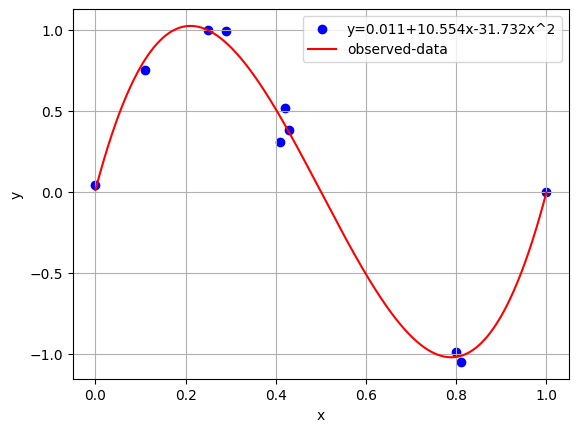

In [13]:
cov_YY = np.cov(predict(X,w,3),Y)
R2 = cov_YY[0,0]/cov_YY[1,1]
print("R2=%.3f"%(R2))
xa = np.linspace(min(X),max(X),1000)
ya = predict(xa,w,3)
plt.scatter(X,Y,color='b')
plt.plot(xa,ya,'r-')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
y_legend = "y="+str(round(w[0],3))+"+"+str(round(w[1],3))+"x"+str(round(w[2],3))+"x^2"
plt.legend([y_legend,"observed-data"])
plt.show()

w= [ 4.87395932e-02  1.98384029e+02 -4.47755792e+03  4.08986697e+04
 -1.95961522e+05  5.43625437e+05 -9.03237557e+05  8.85913047e+05
 -4.72733950e+05  1.05775053e+05]


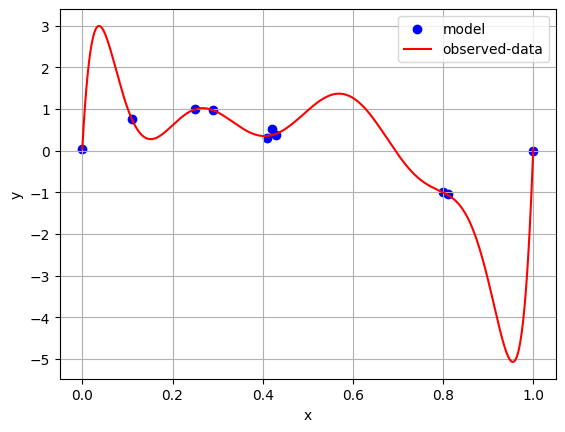

In [14]:
X = np.array([ 0.  ,  0.11,  0.25,  0.29,  0.41,  0.42,  0.43,  0.8 ,  0.81, 1.  ])
Y = np.array([ 0.04,  0.75,  1.  ,  0.99,  0.31,  0.52,  0.38, -0.99, -1.05, 0.  ])
w = fit(X,Y,9)
print("w=",w)
xa = np.linspace(min(X),max(X),1000)
ya = predict(xa,w,9)
plt.scatter(X,Y,color='b')
plt.plot(xa,ya,'r-')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
#y_legend = "y="+str(round(w[0],3))+"+"+str(round(w[1],3))+"x"+str(round(w[2],3))+"x^2"
plt.legend(["model","observed-data"])
plt.show()

### SGD method 

In [15]:
#X = np.array([1,3,4,7,9,14])
#y = np.array([3,7,11,19,29,45])
#X = np.array([1, 3, 6, 8])
#y = np.array([3, 6, 5, 7])
X = np.array([1.52,1.57,1.60,1.63,1.50,1.47,1.65,1.68,1.70])
y = np.array([54.48,55.84,57.20,56.57,53.12,52.21,59.93,61.29,67.92])

In [16]:
XP = np.vstack([np.ones_like(X), X]).T
beta = np.zeros(XP.shape[1])

eta = 1e-3
for t in range(100000):
    y_hat = XP @ beta
    beta -= 2 * eta * XP.T @ (y_hat - y)

In [17]:
beta

array([-25.76358113,  52.40677129])

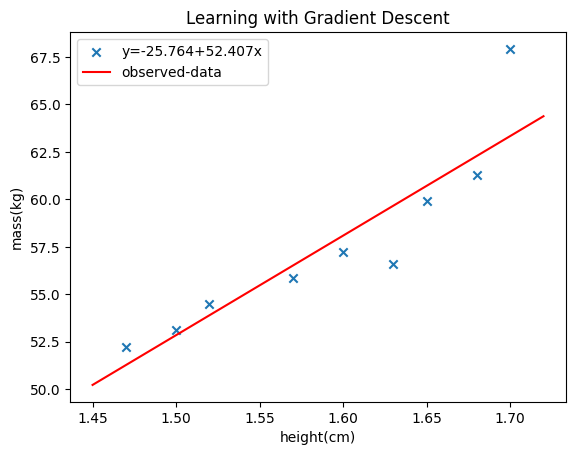

In [18]:
xa = np.linspace(1.45,1.72,50)
plt.scatter(X,y,marker='x')
plt.plot(xa,predict(xa,beta,1),'r-')
plt.xlabel('height(cm)')
plt.ylabel('mass(kg)')
y_legend = "y="+str(round(beta[0],3))+"+"+str(round(beta[1],3))+"x"
plt.legend([y_legend,"observed-data"])
plt.title("Learning with Gradient Descent")
plt.show()

In [19]:
import random
import numpy as np

X = np.array([1.52,1.57,1.60,1.63,1.50,1.47,1.65,1.68,1.70])
y = np.array([54.48,55.84,57.20,56.57,53.12,52.21,59.93,61.29,67.92])

beta = np.zeros(2)
d_index = list(range(len(X)))

eta = 1e-3
for t in range(100000):
  random.shuffle(d_index)
  for i in d_index :
    XP = np.vstack([np.ones_like(X[i]), X[i]]).T
    y_hat = XP @ beta
    beta -= 2 * eta * XP.T @ (y_hat - y[i])

beta

array([-25.79180215,  52.42341865])

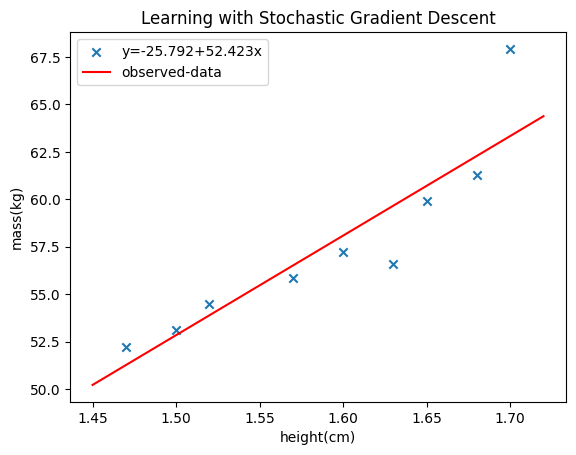

In [22]:
xa = np.linspace(1.45,1.72,50)
plt.scatter(X,y,marker='x')
plt.plot(xa,predict(xa,beta,1),'r-')
plt.xlabel('height(cm)')
plt.ylabel('mass(kg)')
y_legend = "y="+str(round(beta[0],3))+"+"+str(round(beta[1],3))+"x"
plt.legend([y_legend,"observed-data"])
plt.title("Learning with Stochastic Gradient Descent")
plt.show()